In [23]:
import math, random
import pandas as pd
#from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree

import sys
sys.path.append(".")
from ImageData import *
from Functions import *

# **A) Make sure that you obtained or created a test set.**

In [25]:
# Load Data

train_folder = "data/train/"
X_train, y_train =Load_Image_Dataset(train_folder)
test_folder = "data/test/"
X_test, y_test =Load_Image_Dataset(test_folder)

# Get training Images Features 
AllFeatures = extractfeatures(X_train)

print('Shape : ',AllFeatures[0].shape)
print('Unique Labels : ', np.unique(y_train))

# Perform Feature Reduction
X = AllFeatures.copy()
X_test = extractfeatures(X_test)

'''
##### Use Features Reduction
Features_num = 900
X = PCA_FeatureReduction(X ,Features_num , X_train)
X_test = PCA_FeatureReduction(X_test ,Features_num , X_test)
'''
y = y_train.copy()

### Convert to DataFrame
X= pd.DataFrame(X)
y= pd.DataFrame(y)
X_test= pd.DataFrame(X_test)
y_test= pd.DataFrame(y_test)
### Convert the columns from Integer to String
X.columns = X.columns.map(str)
y.columns = y.columns.map(str)
X_test.columns = X_test.columns.map(str)
y_test.columns = y_test.columns.map(str)

Shape :  (2304,)
Unique Labels :  [3 4 6]


In [26]:
print("X Shape : ",X.shape)
print("y Labels Shape {}  and unique lables are : {}".format(y.shape,np.unique(y)))
print("X_test Shape : ",X_test.shape)
print("y_test Labels Shape {}  and unique lables are : {}".format(y_test.shape,np.unique(y_test)))

X Shape :  (14330, 2304)
y Labels Shape (14330, 1)  and unique lables are : [3 4 6]
X_test Shape :  (2099, 2304)
y_test Labels Shape (2099, 1)  and unique lables are : [3 4 6]


## **B) Use Decision trees (the J48 algorithm) on a training set, measure the accuracy. Then measure the  accuracy  on  the  training  set  using  10-fold  cross-validation.  Record  all  your  findings  and  explain them. Use the major metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area if needed.**

##### Use Decision trees (the J48 algorithm) on a training set, measure the accuracy. 

In [28]:
from sklearn import metrics ###for accuracy calculation we import scikit-learn metrics module
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4254406860409719


##### Plotting my Tree

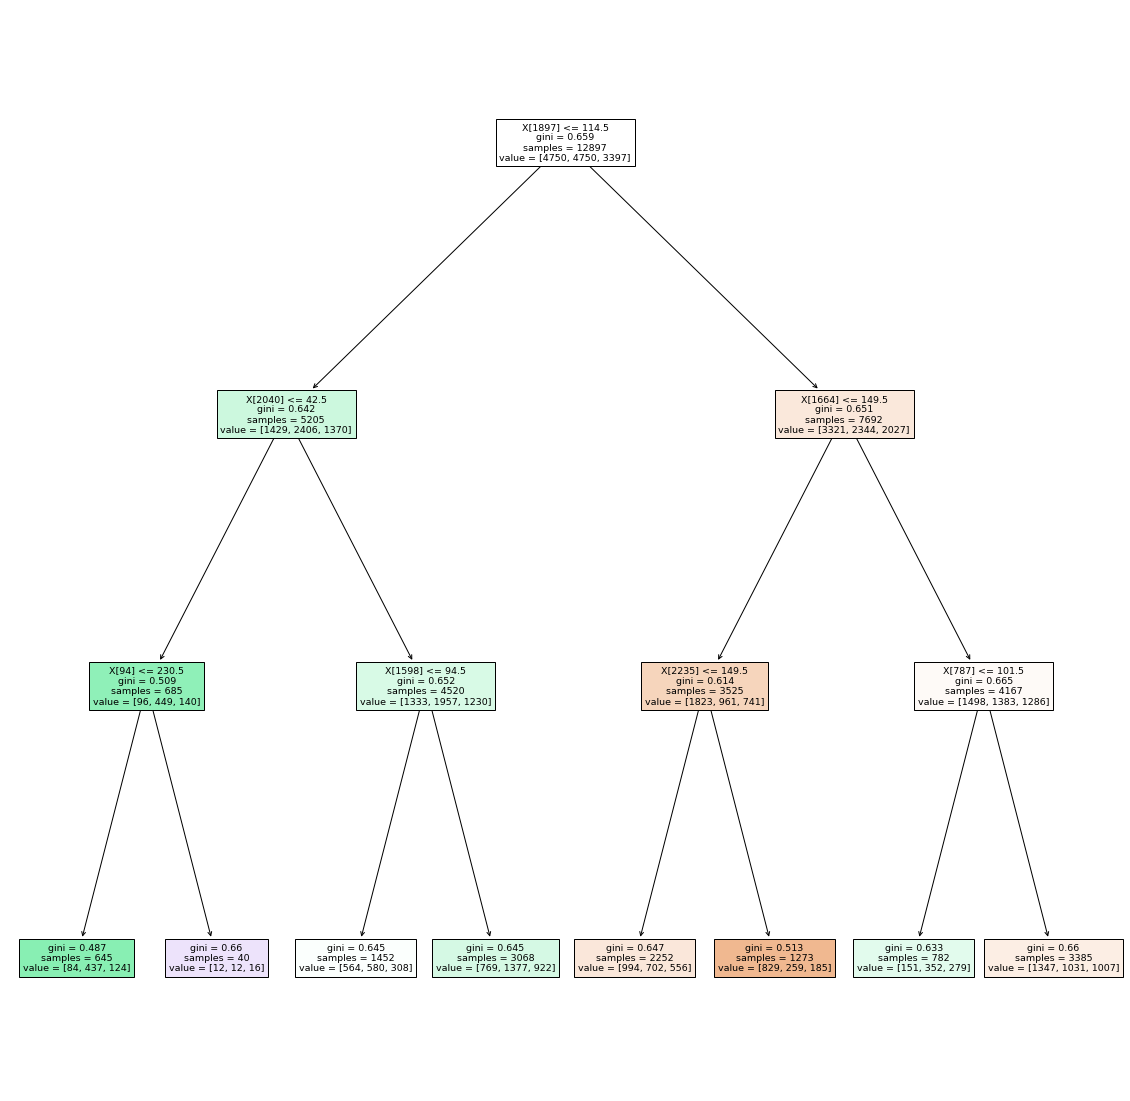

In [53]:
plt.figure(figsize=(20,20))
plot_tree(tree_clf, filled=True);

##### Then measure the  accuracy  on  the  training  set  using  10-fold  cross-validation. 

Mean Accuracy using 10 Fold : 0.429    (+/- 0.010) 
[[391 159 329]
 [170 167 257]
 [187 104 335]] : is the confusion matrix
0.4254406860409719 : is the accuracy score
0.4372884469572775 : is the precision score
0.4254406860409719 : is the recall score
0.42274714420715126 : is the f1 score
True Positive Ratio =  0    0.444824
1    0.281145
2    0.535144
dtype: float64
True Negative Ratio =  0    0.707377
1    0.825249
2    0.602172
dtype: float64
False Positive Ratio =  0    0.292623
1    0.174751
2    0.397828
dtype: float64
False Negative Ratio =  0    0.555176
1    0.718855
2    0.464856
dtype: float64


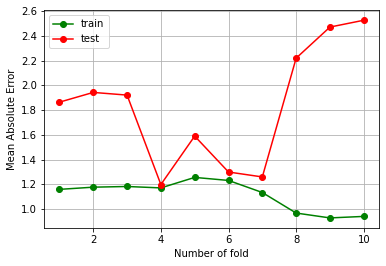

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std


# Using Kfolds of 10
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# evaluate model
scores = cross_val_score(tree_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy using 10 Fold : {:.3f}    (+/- {:.3f}) '.format(scores.mean(),scores.std()))

tree_clf.fit(X,y)
y_pred = tree_clf.predict(X_test)

_confusion_matrix = confusion_matrix(y_test, y_pred)
print(_confusion_matrix, ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred,average='weighted'), ": is the precision score")  #None, 'micro', 'macro', 'weighted', 'samples'
print(recall_score(y_test, y_pred,average='weighted'), ": is the recall score")
print(f1_score(y_test, y_pred,average='weighted'), ": is the f1 score")


cm = pd.DataFrame(_confusion_matrix)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.values.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
print("True Positive Ratio = " , TPR)
TNR = TN/(TN+FP) 
print("True Negative Ratio = " , TNR)
FPR = FP/(FP+TN)
print("False Positive Ratio = " , FPR)
FNR = FN/(TP+FN)
print("False Negative Ratio = " , FNR)

# Testing my Model 
Test_Model_with_Folds(tree_clf,X,y) 



## **D) Experiment with various decision tree parametersthat control the size of the tree. For example: depthof the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances permissible per leaf. Make conclusions about their influence on the classifier's performance.**

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'splitter'  :['best', 'random'],
              #'min_samples_split' : (20,40,60), 
              #'min_samples_leaf' : (1,2,3,4,5,6,7)
             }
tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=2, verbose=True)
grid_search.fit(X, y)

print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: ", grid_search.best_params_)
final_model = grid_search.best_estimator_
print("Best Module is : " , final_model)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:  4.3min finished


Best cross-validation score: 0.436
Best parameters:  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
Best Module is :  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       max_features='auto', random_state=1024)


#### Training on the best Model Returned !

In [32]:
#Training the model on Best Model returned
tree_clas = final_model
tree_clas.fit(X, y)

y_pred_Train = tree_clas.predict(X)
y_pred_Test = tree_clas.predict(X_test)

# Model Accuracy
print("Accuracy on Training Datase  : ",metrics.accuracy_score(y, y_pred_Train))
print("Accuracy on Testing DataSet  : ",metrics.accuracy_score(y_test, y_pred_Test))

Accuracy on Training Datase  :  0.4690858339148639
Accuracy on Testing DataSet  :  0.4483087184373511


## **E) Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets**

In [33]:
from sklearn.model_selection import train_test_split
New_X_Train, New_X_Test, New_y_Train, New_y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clas.fit(New_X_Train, New_y_Train)
y_pred_Train = tree_clas.predict(New_X_Train)
y_pred_Test = tree_clas.predict(New_X_Test)

# Model Accuracy
print("Accuracy on Training Datase  : ",metrics.accuracy_score(New_y_Train, y_pred_Train))
print("Accuracy on Testing DataSet  : ",metrics.accuracy_score(New_y_Test, y_pred_Test))

Accuracy on Training Datase  :  0.4797128900408733
Accuracy on Testing DataSet  :  0.42474994184694115


## **F) Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets**

Accuracy on Training Datase  :  0.5115143056524774
Accuracy on Testing DataSet  :  0.42998371714352174


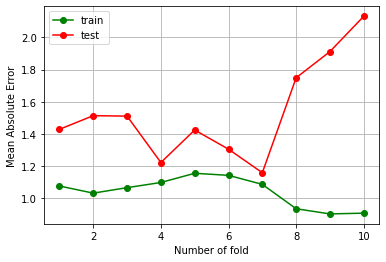

In [34]:
from sklearn.model_selection import train_test_split
New_X_Train, New_X_Test, New_y_Train, New_y_Test = train_test_split(X, y, test_size=0.6, random_state=42)

tree_clas.fit(New_X_Train, New_y_Train)
y_pred_Train = tree_clas.predict(New_X_Train)
y_pred_Test = tree_clas.predict(New_X_Test)

# Model Accuracy
print("Accuracy on Training Datase  : ",metrics.accuracy_score(New_y_Train, y_pred_Train))
print("Accuracy on Testing DataSet  : ",metrics.accuracy_score(New_y_Test, y_pred_Test))

# Testing my Model based on the Best Model selected
Test_Model_with_Folds(tree_clas,X,y) 

## **G) Analyse  your  results  from  the  point  of  view  of  the  problem  of  classifier  over-fitting.Do  you notice the effects of over-fitting? How?Noteyour conclusionsin the Jupyter notebook.**

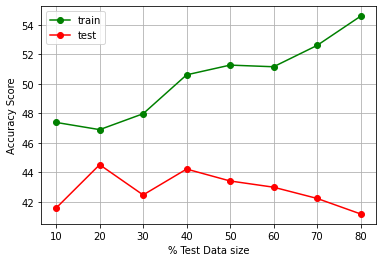

'\nThe above function tests the accuracy on the Train and Test data under multiple splits\nyou can notice that with 20% of Test data it is giving the closest accuracy\naccuracy for Train Data ia approximatly 47% while it is around 45.5% for Test data.\nthe more the test data increase, the more the accuracy converge between the training and test datasets as per the below graph and hence overfitting occurs causing the accuracy to vary alot !\n'

In [37]:
# Yes, accuracy dropped to 43.6% 

Test_Accuracy_vs_DataSize(tree_clas,X,y) 

'''
The above function tests the accuracy on the Train and Test data under multiple splits
you can notice that with 20% of Test data it is giving the closest accuracy
accuracy for Train Data ia approximatly 47% while it is around 45.5% for Test data.
the more the test data increase, the more the accuracy converge between the training and test datasets as per the below graph and hence overfitting occurs causing the accuracy to vary alot !
'''

## **H) For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the above experiments and make conclusions.**

For Model :  ExtraTreesClassifier(max_depth=6, n_estimators=10, random_state=42)
************************************************************


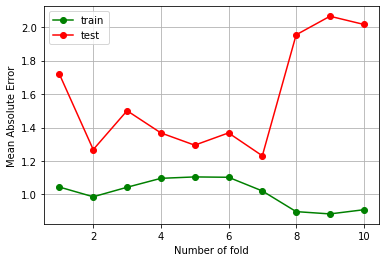

For Model :  RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)
************************************************************


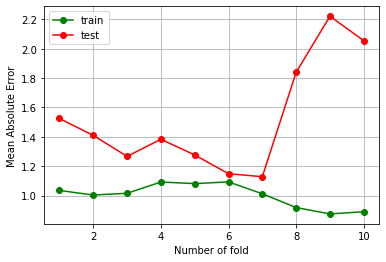

For Model :  ExtraTreesClassifier(max_depth=6, n_estimators=10, random_state=42)
************************************************************


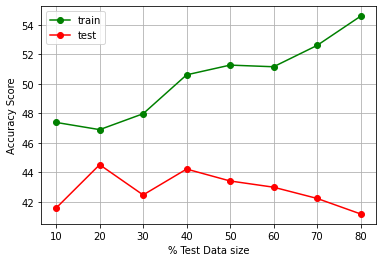

For Model :  RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)
************************************************************


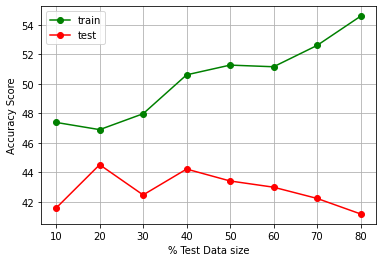

In [52]:
## https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
 
# get a list of models to evaluate
def get_models():
	models = list()
	#models.append(BaggingClassifier( n_estimators=10, random_state=42))
	models.append(ExtraTreesClassifier(max_depth=6, n_estimators=10, random_state=42))
	models.append(RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42))
	return models
 
# get the list of models to consider
models = get_models()
'''
# evaluate each model 
for model in models:
	print("For Model : ", model)
	print("*" *60)
	Test_Model_with_Folds(model,X,y) 
	Test_Model_with_Folds(model,X,y)
	Test_Accuracy_vs_DataSize(model,X,y) 
'''
print("For Model : ", models[0])
print("*" *60)
Test_Model_with_Folds(model[0],X,y) 
print("For Model : ", models[1])
print("*" *60)
Test_Model_with_Folds(model[1],X,y)
print("For Model : ", models[0])
print("*" *60)
Test_Accuracy_vs_DataSize(model[0],X,y) 
print("For Model : ", models[1])
print("*" *60)
Test_Accuracy_vs_DataSize(model[1],X,y) 
